# Gradient decent algorithm from scratch


This notebook demonstrates how to implement the gradient descent algorithm 
step-by-step for fitting a simple linear regression model of the form:

$$y = m \cdot x + b$$

We will explore how different learning rates affect convergence of the cost function.

### Import Libraries

In [30]:
import numpy as np #numerical operations
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

### Gradient Descent Function

In [17]:
def gradient_decent(x, y, iterations = 1000, learning_rate = 0.001):
    if len(x) != len(y):
        raise Exception("X and Y lengths mismatch (X: {}, y:{})".format(len(x), len(y)))
    n = len(x)
    m_curr = b_curr = 0
    data = []
    
    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/n)*np.sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*np.sum(x*(y-y_predicted))
        bd = -(2/n)*np.sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        data.append(tuple([i, cost, m_curr, b_curr]))
    
    return data

### Dataset

We create a synthetic dataset where $y=2x+3$.

In [18]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

### Visualizing Convergence

We run the gradient descent with a small learning rate (0.001).

In [19]:
df = pd.DataFrame(gradient_decent(x, y), columns=['Iteration', 'Cost', 'm', 'b'])
df.tail()

,Iteration,Cost,m,b
995,995,0.479274,2.449307,1.377859
996,996,0.478950,2.449155,1.378407
997,997,0.478626,2.449003,1.378956
998,998,0.478303,2.448851,1.379504
999,999,0.477979,2.448700,1.380052


<Axes: xlabel='Iteration', ylabel='Cost'>

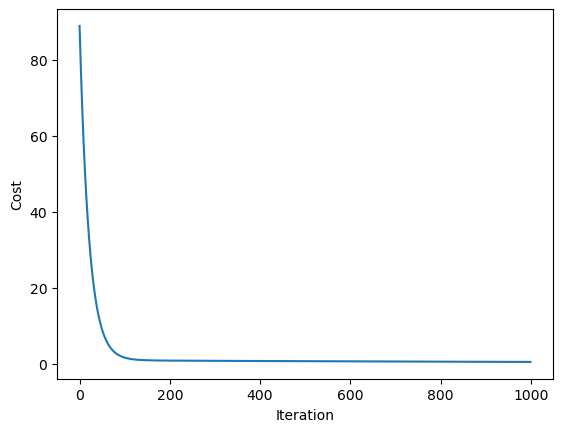

In [20]:
sns.lineplot(data=df, x='Iteration', y='Cost')

In [21]:
df[['m', 'b']].tail(1)

,m,b
999,2.4487,1.380052


### Effect of Learning Rate

<Axes: xlabel='Iteration', ylabel='Cost'>

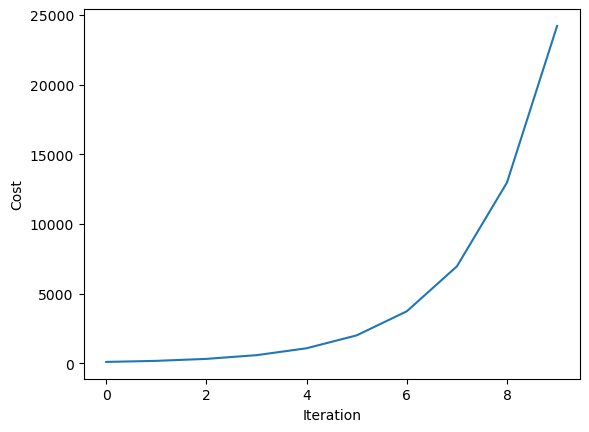

In [ ]:
#learning rate = 0.1
df = pd.DataFrame(gradient_decent(x, y, iterations=10, learning_rate=0.1), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [23]:
df[['m', 'b']].tail(1)

,m,b
9,-57.112135,-15.107274


<Axes: xlabel='Iteration', ylabel='Cost'>

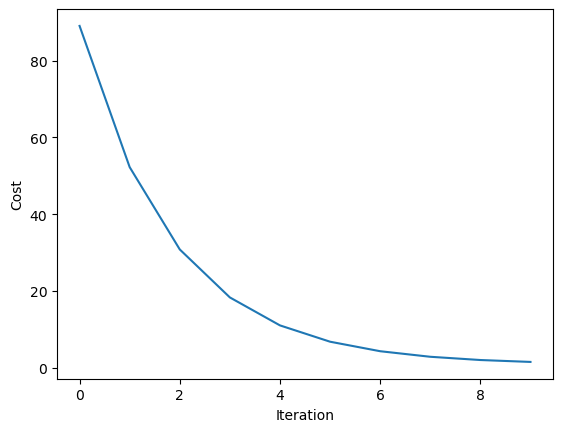

In [ ]:
#learning rate = 0.01
df = pd.DataFrame(gradient_decent(x, y, iterations=10, learning_rate=0.01), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [25]:
df[['m', 'b']].tail(1)

,m,b
9,2.43158,0.754961


<Axes: xlabel='Iteration', ylabel='Cost'>

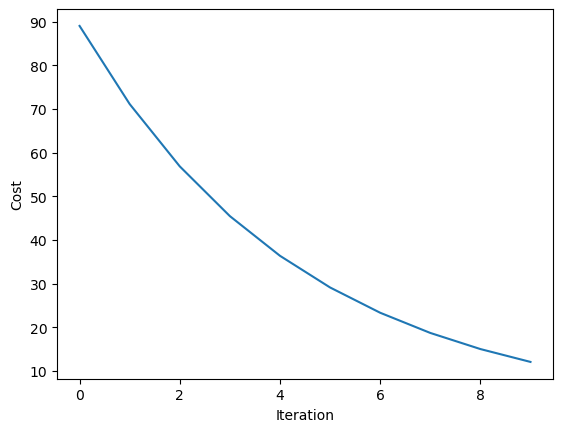

In [ ]:
#learning rate = 0.08
df = pd.DataFrame(gradient_decent(x, y, iterations=10, learning_rate=0.08), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [27]:
df[['m', 'b']].tail(1)

,m,b
9,1.630886,1.038341


We observe that:

- **0.1**: too large -> cost starts to diverge
- **0.01**: small -> cost decreases slowly
- **0.08**: a better balance -> cost decreases quickly without divergence

### Increasing iterations

Use the stable learning rate (0.08), then increase to 500 to allow the model to converge.

<Axes: xlabel='Iteration', ylabel='Cost'>

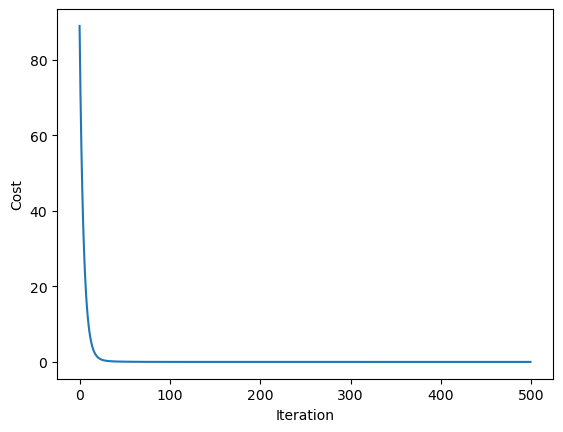

In [33]:
df = pd.DataFrame(gradient_decent(x, y, iterations=500, learning_rate=0.08), columns=['Iteration', 'Cost', 'm', 'b'])
sns.lineplot(data=df, x='Iteration', y='Cost')

In [34]:
df[['m', 'b']].tail(1)

,m,b
499,2.000001,2.999997


### Conclusion

- Gradient descent successfully minimizes the cost function.
- The choice of learning rate is important:
  - Too small -> very slow learning
  - Too large -> divergence
- With the right learning rate, the algorithm converges to the correct solution.
